In [1]:
import numpy as np
import pandas as pd

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

In [2]:
# loading processed data
df = pd.read_csv('data/customer_churn.csv')

In [45]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


# Missing data

<AxesSubplot:>

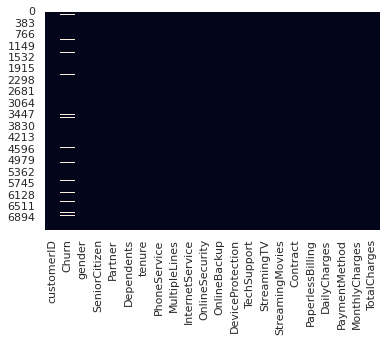

In [4]:
sns.heatmap(df.isna(), cbar=False)

# Churn analysis

In [5]:
df['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

In [6]:
df['Churn'].isna().sum()

224

In [7]:
# droping missing values
df.dropna(inplace=True)

In [8]:
df.describe()

,SeniorCitizen,tenure,DailyCharges,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,2.158723,64.761692,2279.734304
std,0.368612,24.559481,1.003002,30.090047,2266.794470
min,0.000000,0.000000,0.608333,18.250000,0.000000
25%,0.000000,9.000000,1.183333,35.500000,398.550000
50%,0.000000,29.000000,2.345000,70.350000,1394.550000
75%,0.000000,55.000000,2.995000,89.850000,3786.600000
max,1.000000,72.000000,3.958333,118.750000,8684.800000


In [9]:
cols = df.select_dtypes('object').columns[2:]
cols_arr = np.array(cols).reshape(3, 5)

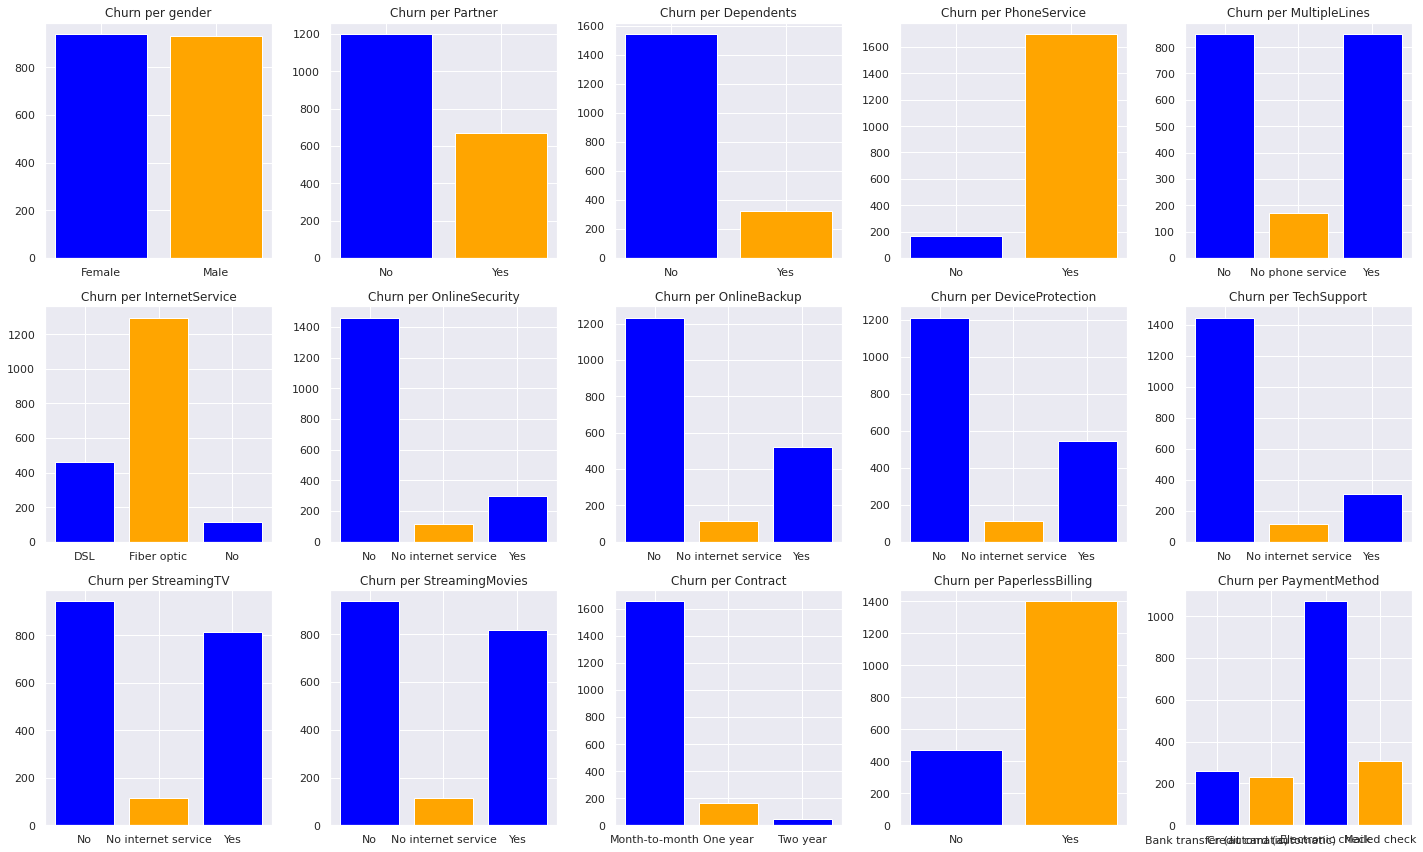

In [10]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)

fig, ax = plt.subplots(cols_arr.shape[0], cols_arr.shape[1], figsize = (20, 12))

for i in range(cols_arr.shape[0]):
    for j in range(cols_arr.shape[1]):
        df_churn_col = df_aux.groupby(cols_arr[i, j], as_index=False).agg({'Churn': 'sum'})
        ax[i, j].bar(x=cols_arr[i, j], height='Churn',
                     data=df_churn_col,
                     color=['blue', 'orange'])
        ax[i, j].set_title(f"Churn per {cols_arr[i, j]}")
plt.tight_layout()

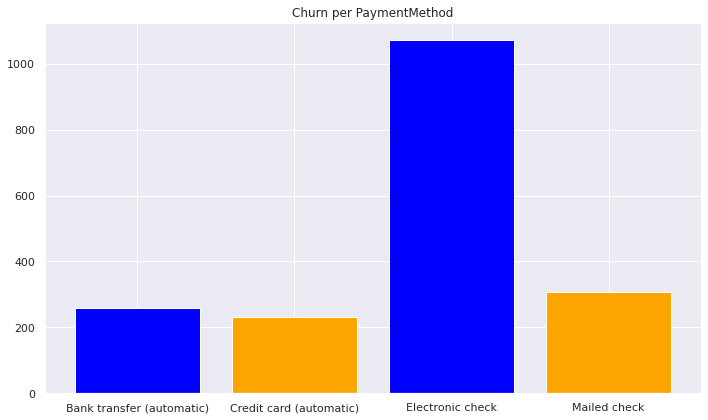

In [11]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)
df_churn_PaymentMethod = df_aux.groupby('PaymentMethod', as_index=False).agg({'Churn': 'sum'})
df_churn_PaymentMethod

plt.figure(figsize = (10, 6))
plt.bar(x='PaymentMethod', height='Churn', 
        data=df_churn_PaymentMethod,
        color=['blue', 'orange'])
plt.title('Churn per PaymentMethod');
plt.tight_layout()

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Correlations

In [13]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'DailyCharges', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [14]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


In [15]:
binary_data = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 
                  'Dependents', 'PhoneService', 'PaperlessBilling']]

## Tetrachoric Correlation (binary variables)

$rtet = cos (\frac{180}{1 + \sqrt{\frac{bc}{ad}}})$

In [16]:
def tetrachoric(x, y, digits=3):
    # build contingency table
    cont_table = pd.crosstab(index=x, columns=y).values
    
    # calculate tetrachoric correlation
    bc = cont_table[0, 1]*cont_table[1, 0]
    ad = cont_table[0, 0]*cont_table[1, 1]
    
    tet_corr = np.cos(np.pi/(1 + np.sqrt(bc/ad)))
    
    return round(tet_corr, digits)

In [17]:
round(tetrachoric(df['Churn'], df['gender']), 3)

0.015

In [18]:
corr_dict = {}
for col in binary_data.columns:
    corrs = []
    for c in binary_data.columns:
        corrs.append(tetrachoric(df[col], df[c]))
    corr_dict[col] = corrs

In [19]:
pd.DataFrame(corr_dict)

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,-1.000,0.015,-0.319,0.268,0.345,-0.037,-0.358
1,0.015,-1.000,0.004,0.003,-0.018,0.017,0.019
2,-0.319,0.004,-1.000,-0.035,0.613,-0.032,-0.361
3,0.268,0.003,-0.035,-1.000,-0.721,-0.047,0.024
4,0.345,-0.018,0.613,-0.721,-1.000,0.005,0.190
5,-0.037,0.017,-0.032,-0.047,0.005,-1.000,-0.044
6,-0.358,0.019,-0.361,0.024,0.190,-0.044,-1.000


In [20]:
pd.crosstab(index=df['Churn'], columns=df['Churn']).values

array([[5174,    0],
       [   0, 1869]])

<AxesSubplot:>

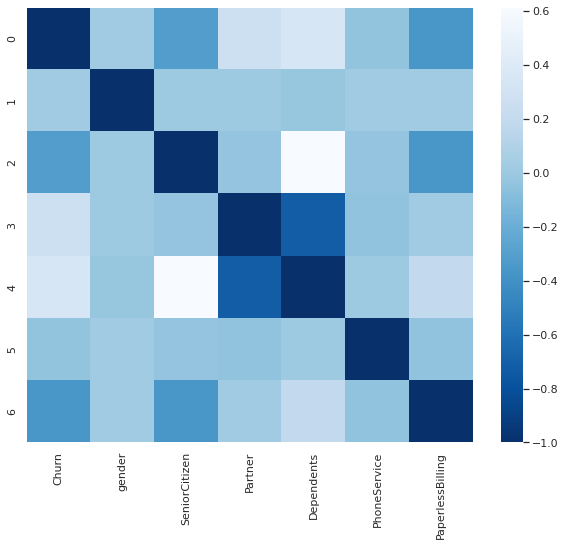

In [44]:
plt.figure(figsize=(10, 8))
corr = pd.DataFrame(corr_dict)
sns.heatmap(corr, cmap='Blues_r')